# TensorFlow CNN Basics

3 x 3 img, 2 x 2 x 1 filter(w) 사용
strid: 1x1

2x2x1 의 Convolutional Data가 나오겠지.

In [3]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

(1, 3, 3, 1)


/Users/sanghyuk/anaconda/lib/python3.6/site-packages/tensorflow/python/client/session.py:1714: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


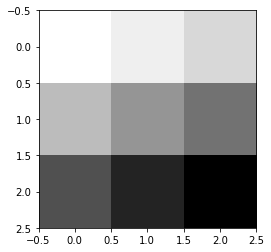

In [10]:
sess = tf.InteractiveSession()

#shape -> (1, 3, 3 ,1) 3x3x1을 만드는 것. 
#맨앞에 1은 n개를 사용하게 됨. 몇개의 이미지를 사용하게 될 것인가?
#하나의 이미지만 가지고 할꺼니깐 지금은 1 한 것. 
#rgb를 썻으면 마지막 칸이 3이 되겠지. 
image = np.array([[[[1],[2],[3]],
                   [[4],[5],[6]], 
                   [[7],[8],[9]]]], dtype=np.float32)

print(image.shape)
plt.imshow(image.reshape(3,3), cmap='Greys')

Filter의 크기는 어떻게 할것인가?<br>
Filter : 2, 2, 1, 1 -> 2x2x1 Filter를 1개 사용하겠다.<br>
Filter를 그림위에 올려놓고 Wegith판떼기랑 곱해서 더함<br>
서로 마주보는 숫자끼리 곱함. 

In [13]:
print("image.shape:", image.shape)

image.shape: (1, 3, 3, 1)


In [16]:
weight = tf.constant([[[[1.]], [[1.]]], [[[1.]], [[1.]]]])
weight.shape # (2, 2, 1, 1) filter와 weight은 shape이 동일,
# 2, 2, 1 weight을 1개 사용하게 됨. 

TensorShape([Dimension(2), Dimension(2), Dimension(1), Dimension(1)])

weight.shape:  (2, 2, 1, 1)
conv2d_img.shape (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


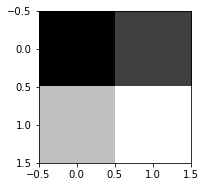

In [23]:
print("weight.shape: ", weight.shape)
conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding="VALID")
#strid 1*1을 줌. 
conv2d_img=conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)


conv2d_img=np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2,2))
    plt.subplot(1, 2, i+1), plt.imshow(one_img.reshape(2,2), cmap='gray')


#### Filter

padding option을 SAME으로 주면, <br>
strid 1*1일때 filter사이즈 상관없이 convolutional을 원래 이미지 크기 같게 나오게 해줌.<br>
Con입력 출력의 입출력 크기가 같게 해줌. 

In [24]:
print("image.shape", image.shape)

image.shape (1, 3, 3, 1)


In [26]:
weight = tf.constant([[[[1.]], [[1.]]], [[[1.]], [[1.]]]])
weight.shape # (2, 2, 1, 1) filter와 weight은 shape이 동일,
# 2, 2, 1 weight을 1개 사용하게 됨. 

TensorShape([Dimension(2), Dimension(2), Dimension(1), Dimension(1)])

In [27]:
print("weight.shape", weight.shape)

weight.shape (2, 2, 1, 1)


conv2d_img.shape (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


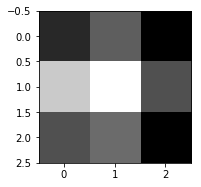

In [34]:
conv2d = tf.nn.conv2d(image, weight, strides = [1,1,1,1], padding='SAME')
conv2d_img = conv2d.eval()
print("conv2d_img.shape", conv2d_img.shape)

conv2d_img=np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1, 2, i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')


## 3 Filters

weight.shape-> (2, 2, 1, 3) 여기서 3이 <br>
the number of filters. 

image.shape (1, 3, 3, 1)
weight.shape (2, 2, 1, 3)
conv2d_img.shape (1, 3, 3, 3)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


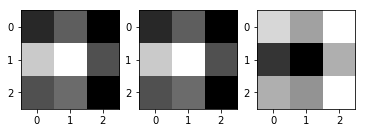

In [37]:
# print("imag:\n", image)
print("image.shape", image.shape)

weight = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                      [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
#weight.shape(2, 2, 1, 3) -> 2*2*1짜리 filter 3개 적용
print("weight.shape", weight.shape)

conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()

print("conv2d_img.shape", conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

conv_img.shape가 (1, 3, 3, 3이 나옴)<br>
3*3짜리 이미지가 filter를 3개 적용해서 3개가 나온 것. 

## Max Pooling

In [42]:
image = np.array([[[[4],[3]],
                    [[2],[1]]]], dtype=np.float32)
print("image.shape: ", image.shape)
pool = tf.nn.max_pool(image, ksize=[1, 2, 2, 1], #ksize는 filter size
                    strides=[1, 1, 1, 1], padding='SAME')
print(pool.shape)
print(pool.eval())

image.shape:  (1, 2, 2, 1)
(1, 2, 2, 1)
[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


## MNIST

In [45]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


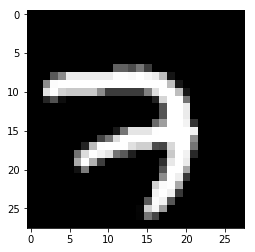

In [46]:
img = mnist.train.images[0].reshape(28,28)
plt.imshow(img, cmap='gray')

/Users/sanghyuk/anaconda/lib/python3.6/site-packages/tensorflow/python/client/session.py:1714: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Tensor("Conv2D_15:0", shape=(1, 14, 14, 5), dtype=float32)


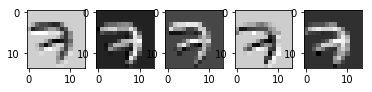

In [49]:
sess = tf.InteractiveSession()

#img를 28*28의 1색 이미지 -1은 n개 이미지니깐 너 알아서 계산해~
img = img.reshape(-1,28,28,1) 

#filter 3*3*1을 5개 사용하겠다. 
#stride 1*1기준으로 SAME을 넣으면 똑같은 이미지 output이 나오는데 
#strid 2*2가 되고 SAME을 넣으면 반띵이됨. 14*14
W1 = tf.Variable(tf.random_normal([3, 3, 1, 5], stddev=0.01))
conv2d = tf.nn.conv2d(img, W1, strides=[1, 2, 2, 1], padding='SAME')

print(conv2d)
sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img, 0, 3)
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')

Filter 5개라서 5개의 이미지가 출력 된 것.

Tensor("MaxPool_6:0", shape=(1, 7, 7, 5), dtype=float32)


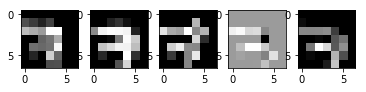

In [52]:
pool = tf.nn.max_pool(conv2d, ksize = [1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME")
print(pool)
sess.run(tf.global_variables_initializer())
pool_img = pool.eval()
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7, 7), cmap='gray')

stride가 2라서 이미지 또 반띵으로 7x7로 줄어든 것. 